1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Load Data

In [2]:
df = pd.read_csv("Financial Sample.csv")

3. Initial Inspection

In [3]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",1/1/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",1/1/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",6/1/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",6/1/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",6/1/2014,6,June,2014


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Segment                700 non-null    object 
 1   Country                700 non-null    object 
 2    Product               700 non-null    object 
 3    Discount Band         700 non-null    object 
 4   Units Sold             700 non-null    float64
 5    Manufacturing Price   700 non-null    object 
 6    Sale Price            700 non-null    object 
 7    Gross Sales           700 non-null    object 
 8    Discounts             700 non-null    object 
 9     Sales                700 non-null    object 
 10   COGS                  700 non-null    object 
 11   Profit                700 non-null    object 
 12  Date                   700 non-null    object 
 13  Month Number           700 non-null    int64  
 14   Month Name            700 non-null    object 
 15  Year  

In [5]:
df.shape

(700, 16)

4. Standardize Column Names

In [6]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
)

5. Data Type Cleaning

In [7]:
# Monetary columns
money_cols = [
    'manufacturing_price', 'sale_price', 'gross_sales',
    'discounts', 'sales', 'cogs', 'profit'
]

def clean_money_column(series):
    series = series.astype(str).str.strip()
    series = series.str.replace(r'[\$,]', '', regex=True)
    series = series.replace(r'^-$', '0', regex=True)
    series = series.str.replace(r'^\((.*)\)$', r'-\1', regex=True)
    return series.astype(float)

for col in money_cols:
    df[col] = clean_money_column(df[col])


# Date column
df['date'] = pd.to_datetime(df['date'], errors='coerce')

6. Missing & Duplicate Checks

In [8]:
df.isnull().sum()


segment                0
country                0
product                0
discount_band          0
units_sold             0
manufacturing_price    0
sale_price             0
gross_sales            0
discounts              0
sales                  0
cogs                   0
profit                 0
date                   0
month_number           0
month_name             0
year                   0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

7. Data Consistency Checks

In [10]:
# Categorical sanity checks
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()
    print(f"\n{col.upper()}")
    print(df[col].value_counts())





SEGMENT
segment
government          300
midmarket           100
channel partners    100
enterprise          100
small business      100
Name: count, dtype: int64

COUNTRY
country
canada                      140
germany                     140
france                      140
mexico                      140
united states of america    140
Name: count, dtype: int64

PRODUCT
product
paseo        202
velo         109
vtt          109
amarilla      94
carretera     93
montana       93
Name: count, dtype: int64

DISCOUNT_BAND
discount_band
high      245
medium    242
low       160
none       53
Name: count, dtype: int64

MONTH_NAME
month_name
october      140
december     105
june          70
september     70
november      70
january       35
march         35
july          35
august        35
february      35
april         35
may           35
Name: count, dtype: int64


In [11]:
# Numerical summary
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].describe().round(2)


,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,month_number,year
count,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00,700.00
mean,1608.29,96.48,118.43,182759.43,13150.35,169609.07,145475.21,24133.86,7.90,2013.75
std,867.43,108.60,136.78,254262.28,22962.93,236726.35,203865.51,42760.63,3.38,0.43
min,200.00,3.00,7.00,1799.00,0.00,1655.08,918.00,-40617.50,1.00,2013.00
25%,905.00,5.00,12.00,17391.75,800.32,15928.00,7490.00,2805.96,5.75,2013.75
50%,1542.50,10.00,20.00,37980.00,2585.25,35540.20,22506.25,9242.20,9.00,2014.00
75%,2229.12,250.00,300.00,279025.00,15956.35,261077.50,245607.50,22662.00,10.25,2014.00
max,4492.50,260.00,350.00,1207500.00,149677.50,1159200.00,950625.00,262200.00,12.00,2014.00


In [12]:
# Date range check
print(f"Date range: {df['date'].min()} → {df['date'].max()}")

Date range: 2013-09-01 00:00:00 → 2014-12-01 00:00:00


8. Business Logic Validation

In [13]:
# Sales consistency
sales_error = df[~np.isclose(
    df['sales'],
    df['gross_sales'] - df['discounts']
)]

# Profit consistency
profit_error = df[~np.isclose(
    df['profit'],
    df['sales'] - df['cogs']
)]

print(f"Sales calculation errors: {len(sales_error)}")
print(f"Profit calculation errors: {len(profit_error)}")

Sales calculation errors: 0
Profit calculation errors: 0


9. Outlier Detection (IQR)

In [14]:
outlier_summary = {}

for col in [
    'units_sold','manufacturing_price','sale_price',
    'gross_sales','discounts','sales','cogs','profit'
]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df[
        (df[col] < Q1 - 1.5 * IQR) |
        (df[col] > Q3 + 1.5 * IQR)
    ]

    outlier_summary[col] = len(outliers)

outlier_summary

{'units_sold': 4,
 'manufacturing_price': 0,
 'sale_price': 0,
 'gross_sales': 55,
 'discounts': 75,
 'sales': 53,
 'cogs': 36,
 'profit': 103}

10. Visualization

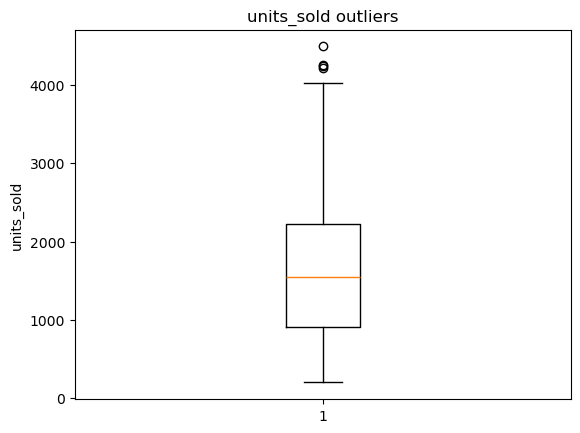

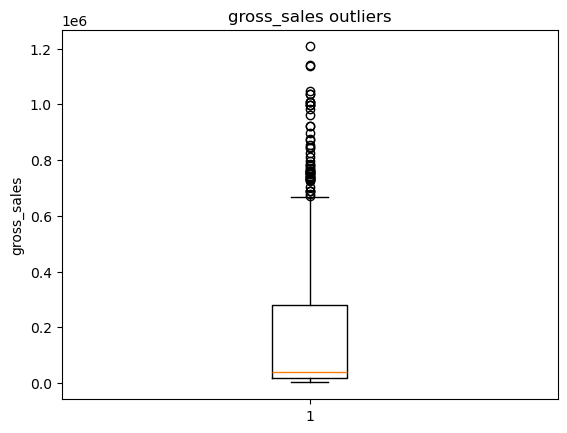

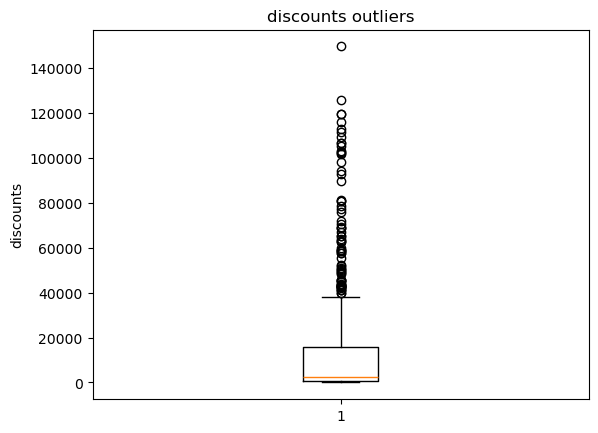

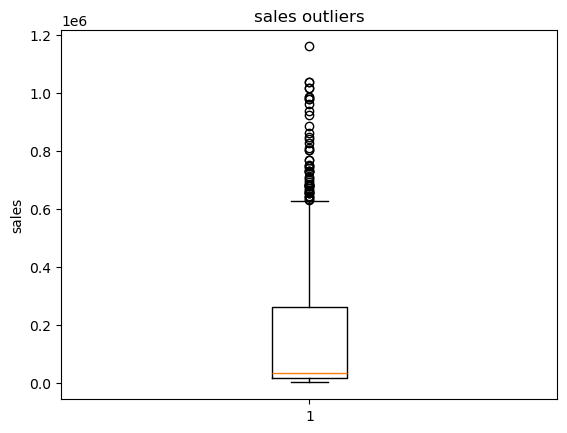

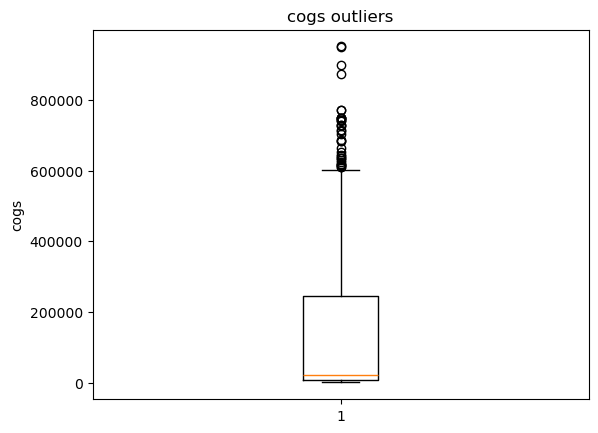

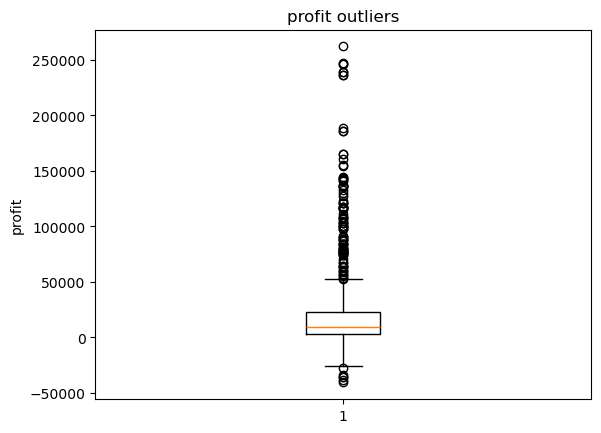

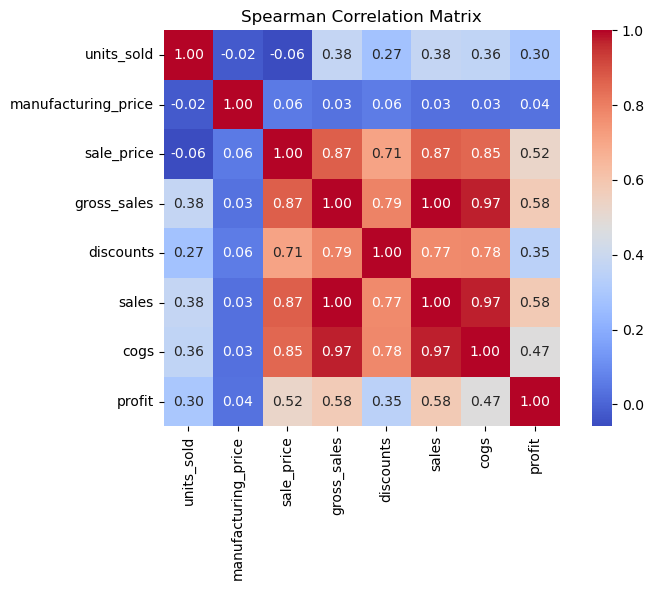

In [15]:
# Outliers
for col in [
    'units_sold','gross_sales','discounts',
    'sales','cogs','profit'
]:

    plt.boxplot(df[col])
    plt.title(f"{col} outliers")
    plt.ylabel(col)
    plt.show()

# Correlation matrix (Spearman)
num_cols = ['units_sold','manufacturing_price','sale_price','gross_sales',
            'discounts','sales','cogs','profit']

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(method='spearman'), annot=True, fmt=".2f",
            cmap="coolwarm", cbar=True, square=True)
plt.title("Spearman Correlation Matrix")
plt.tight_layout()
plt.show()

In [16]:
df.to_csv("Financial Sample Cleaned.csv")